Here,importing all the required libraries ,layers required by keras,and mouting the Google drive.


In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers  import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout


In [2]:
import pandas as pd
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


The below step is tha Data Augmentation(where some kind of Data transformation is done on the images ) Step where we have imported ImageDataGenerator class  from keras.

**ImageDataGenerator** augments images in real time while our model is still training.ImageDataGenerator class has three methods:

1)flow()

2)flow_from_directory()

3}flow_from_dataframe

Initializing train_datagen and test_datagen.

shear_range=0.2 implies that the image is shear by 20%.

zoom_range=0.2 implies zoom in and zoom out by 20%.

horizontal_flip=True imples for the mirror reflection.



In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=10/255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=10/255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

In [4]:
train_set=train_datagen.flow_from_directory('/content/gdrive/MyDrive/Project/data/train',target_size=(64,64),batch_size=32,class_mode='binary')

Found 40 images belonging to 2 classes.


In [5]:
test_set=test_datagen.flow_from_directory('/content/gdrive/MyDrive/Project/data/test',target_size=(64,64),batch_size=32,class_mode='binary')

Found 20 images belonging to 2 classes.


Downloading the train and test dataset ,extracting them into diffrent folders names as 'train' and 'test'.
the train folder contain 2 seprate folders name 'cats' and 'dogs 'respectively, each containing images of respective classes.

Here,

**Directory:**is the path where the folder exists where all the test images are present.

**target_size**=is the size ofour input images,every image in the dataset will be resize to this size.

**batch_size:**is the no  of images to be yielded from the generator per batch.

**class_mode:** is set "binary" when we have only two classes to predict.
 same attributes we are setting for the test_set.

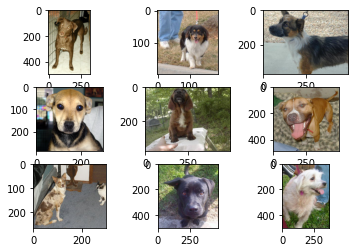

In [6]:
#plotting dog photos from the  dogs vs cats dataset
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
#defining the location of the dataset
folder='/content/gdrive/MyDrive/Project/data/train/dogs/'
#plotting first few images
for i in range(9):
  plt.subplot(330 +1 +i)
  filename=folder+'dog.'+str(i+1)+'.jpg'
  image=imread(filename)
  plt.imshow(image)
plt.show()

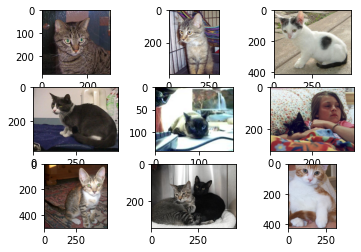

In [7]:
#plotting cat photos from dog vs cat dataset
# here in folder defining the location of the dataset.
from matplotlib import pyplot as plt
from matplotlib.image  import imread
folder="/content/gdrive/MyDrive/Project/data/train/cats/"
for i in range(9):
  plt.subplot(330+ i + 1)
  filename=folder+str(i+1)+'.jpg'
  image=imread(filename)
  plt.imshow(image)
plt.show()

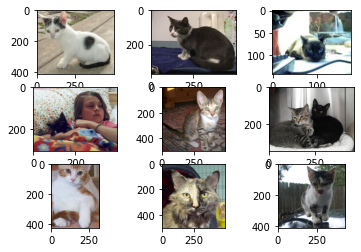

In [8]:
#plotting few images from cat dog dataset
for i in range(9):
  plt.subplot(330+1+i)
  filename=folder+str(i+3)+'.jpg'
  image=imread(filename)
  plt.imshow(image)
plt.show()



Here,according to the problem statement we will initialize the CNN
(Convolition neural network) is artificial neural network which is used for image/object recognition and classification.It has one or more diffrent layers:

**1)Convolutional layer:**is the building blocl of CNN.It contain set of filters or kernels,parameters of e=which are learn through training ,the isze of the kernel are smaller than the actual image .In our model we use 32 filters with  Kernel size of (5,5) and .each filter convolve with the image and produce activatio or featured map.

**input_shape=**is the shape of the input data provided to CNN modelwhile training.

**activation="relu"**,relu helps to prevent the expotential growh in the computational required to operate the neural network,the activation finction generates output based on input signal

**2)Pooling Layer:**It is use to reduce the dimension of feature map produced by the convolution layer.It also provides the ability to learn invariant features and also act as regularizer to further reduce the problem of overfitting.
Maxpooling operation is ffor spatial 2D array.
pool_size=(2,2),is the maximum value for each channel of input which downsample the inputimage.
stride=It is the numberofpixels shifts over the input matrix,when stride is 1  wemove the filters to1 pixel at a timeand when it is 2 ,we move the filters to 2 pixls at a time and so on.
In the same way we add second convolution and pooling layer to our CNN model according to the problem statement.

**3)Flattening layer:**converts the data into 1-dimensional array for as input to the fully connectd layer.In flattening we flatten the output of convolutional layer to create a single long feature vectorand it is connected a fully-connected layer.

4)**Fully conncted layer:**It forms the last few layers in  the neural network,the input to the fully connected layer is the output from the finalpooling olayer which is flattend and then fed into the fully connected layer.

The fully conected layer is followed by the output layerwhere we ue the activation="softmax",because the softmax function transforms the output of a fully connected layer to a probability distribution (a normalized output  between 0 and1)

In [9]:
#initializin the CNN
classifier=Sequential()
#step1:Adding the  Convolution layers

#Convolutional layer 1 :with 32 filters of kernel size[5,5] 

classifier.add(Conv2D(32,(5,5),input_shape=(64,64,3),activation='relu'))
# step 2:ADDING POOLING LAYER
# Pooling layer 1 :with pool size[2,2] and stride 2 
classifier.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
# Adding second convolution layer
#Convolutional layer 2: with 64 filters of kernel size[5,5]

classifier.add(Conv2D(64,(5,5),input_shape=(64,64,3),activation='relu'))
#ADDING SECOND POOLIN LAYER
#Pooling layer 2 :with pool size[2,2] and stride 2 
classifier.add(MaxPooling2D(pool_size=(2,2)))
#step 3:flattening
classifier.add(Flatten())
#step 4:fully connected layer
#Dense layer whose output size is fixed in the hyper parameter: fc_size=32 
classifier.add(Dense(units=32,activation='relu'))
Dropout(0.4)
classifier.add(Dense(units=1,activation='softmax'))

The compile() function is called on a pre buit model and it specifies the loss function ,optimizerand metrics.
Keras defines **loss function** during model compilation process.In my CNN model i have define loss function as 'binary_crossentropy"

**Optimizer:**it is an important process it optimize the input weight by comparing the loss function and prediction.Below i use optimizer='adam' because(the results of adam optimizer is generally better than the other optimization algorithm,the adaptive learning rate is perfect for this type of data.)

**Metrics**:is used to evaluate the performance of our model it is similar to loss functionbutnot used in training process

In [17]:
# STEP 5:compiling the  CNN
classifier.compile(optimizer="adam",loss='binary_crossentropy',metrics=['accuracy'])

Here,we add timer which will calculate the time required in seconds  to run the model.

**Model Training**
Models are trained by numpy arrays using fit() .

**fit()**: the main purpose of this fit function isto evaluate the model on training .

 **train_set **is the tuple to evaluate our data.
 
 **epochs**:no of times the model is needed to evaluate during training.


In [18]:
from timeit import default_timer as timer 
start=timer()
history=classifier.fit(train_set,epochs=100,validation_data=test_set);


end=timer()
print('Training completed ')
print('Time elapsed in seconds',(end-start))

Epoch 1/100
2/2 [==============================] - 1s 342ms/step - loss: 0.6841 - accuracy: 0.5000 - val_loss: 0.6573 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 0s 262ms/step - loss: 0.6327 - accuracy: 0.5000 - val_loss: 0.6643 - val_accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 0s 159ms/step - loss: 0.6093 - accuracy: 0.5000 - val_loss: 0.9235 - val_accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 0s 266ms/step - loss: 0.7761 - accuracy: 0.5000 - val_loss: 0.6575 - val_accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 0s 279ms/step - loss: 0.5550 - accuracy: 0.5000 - val_loss: 0.6227 - val_accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 0s 156ms/step - loss: 0.5880 - accuracy: 0.5000 - val_loss: 0.5901 - val_accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 0s 168ms/step - loss: 0.5515 - accuracy: 0.5000 - val_loss: 0.5914 - val_accuracy: 0.5000
Epoch 8/100
2

At epoch =5 loss: 0.7135 - accuracy: 0.5000 - val_loss: 0.6877 - val_accuracy: 0.5000

at epochs=100 loss: 0.0022 - accuracy: 0.5000 - val_loss: 2.5961 - val_accuracy: 0.5000

Training completed 
Time elapsed in seconds 35.448090947999845

At epochs=200
loss: 0.0010 - accuracy: 0.5000 - val_loss: 2.7314 - val_accuracy: 0.5000
Training completed 
Time elapsed in seconds 72.71037812299983

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


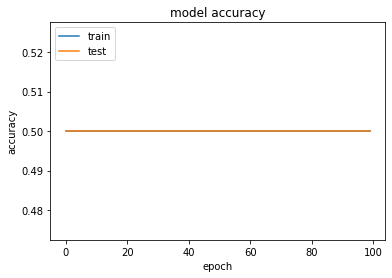

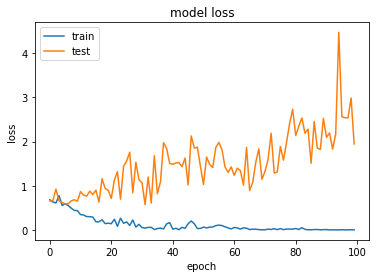

In [19]:
import matplotlib.pyplot as plt
print(history.history.keys())
#summarizing history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel("epoch")
plt.legend(['train', 'test'],loc='upper left')
plt.show()
#summarizing history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

Here,we plot the  history for  loss an accuracy .

In [13]:
#saving the model
classifier.save('project_cnn.h5')

saving the model as project_cnn.h1

In [14]:
#loading the model for new predictions
from tensorflow.keras.models import load_model
model=load_model('project_cnn.h5')
print('model is loaded')
model.summary()

model is loaded
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 32) 

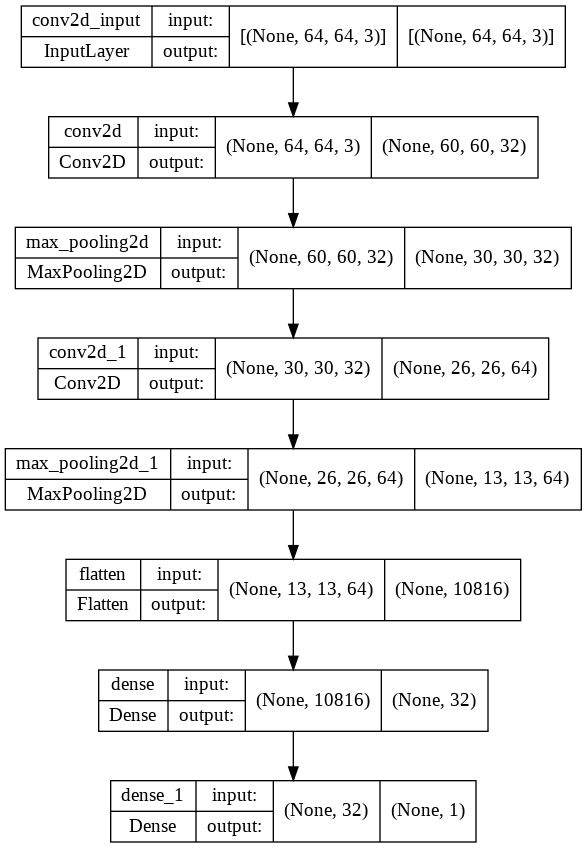

In [15]:
from keras.utils.vis_utils import plot_model
plot_model(model,to_file='model_plot_cnn.png',show_shapes=True,show_layer_names=True)

In [20]:
from google.colab import files
uploaded=files.upload()

Saving 109.jpg to 109.jpg


uploading any image to classify it as dog or cat class.si uploading here image 109.jpg.
The model predicts the image whether is cat or dog and storing the result of the model in a variable named prediction.

In [21]:
#making new preictions
import numpy as np
from tensorflow.keras.preprocessing import image
test_image=image.load_img('/content/109.jpg',target_size=(64,64))
test_image1=image.img_to_array(test_image)
test_image1=np.expand_dims(test_image,axis=0)
result=model.predict(test_image1)
print(result)
#training_set.class_indices
if result[0][0]==1:
  prediction='The given image is of cat'
  print(prediction)

[[1.]]
The given image is of cat


In [22]:
image=imread('/content/109.jpg')
plt.show()
print("model prediction:",prediction)

model prediction: The given image is of cat


In [23]:
#evaluating the model on test data using evaluate
print("\n evalauate on test data")
results=model.evaluate
print('test loss,test accu:',result)



 evalauate on test data
test loss,test accu: [[1.]]


In [24]:
import pandas as pd
test_set.reset
ytesthat=model.predict(test_set)
print(ytesthat)
df=pd.DataFrame({
   'filename':test_set.filenames,
   'predict':ytesthat[:,0],
   'y':test_set.classes

})
pd.set_option('display.float_format',lambda x:'%.5f' %x)
df['y_pred']=df['predict']>0.5
df.y_pred=df.y_pred.astype(int)
df

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


,filename,predict,y,y_pred
0,cats/101.jpg,1.00000,0,1
1,cats/102.jpg,1.00000,0,1
2,cats/103.jpg,1.00000,0,1
3,cats/104.jpg,1.00000,0,1
4,cats/105.jpg,1.00000,0,1
5,cats/106.jpg,1.00000,0,1
6,cats/107.jpg,1.00000,0,1
7,cats/108.jpg,1.00000,0,1
8,cats/109.jpg,1.00000,0,1
9,cats/110.jpg,1.00000,0,1


here we are predicting and storing the result in df['y_pred'] and if the df['predict '] is greater 0.5,0.5 is the threshold value to analyze the prediction,and df.y_pred is converted to int .with the df.y+pred dataframe we will get the misclassification report out of 40 images 10 images were misclassified.

In [25]:
misclassified=df[df['y']!=df['y_pred']]
print('Total misclassified image from 40 validation image: %d' %misclassified['y'].count())


Total misclassified image from 40 validation image: 10


The confusion matrix allow us to visualize the performance of the trained model .It makes it easy to see if the sysytem is confusing two classes.
it is a table of with 4 diffrent combinations of predicted and actual values.

Text(33.0, 0.5, 'true value')

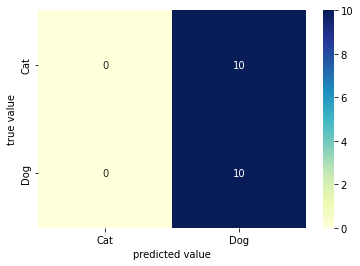

In [26]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import accuracy_score

#prediction of test set
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix=confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g',xticklabels=['Cat','Dog'],yticklabels=['Cat','Dog'])
plt.xlabel('predicted value')
plt.ylabel('true value')